# Python im Labor – Steuern, Messen, Filtern, Darstellen

Dieses Jupyter-Notebook enthält den Quelltext für Kapitel 13 »Python im Labor – Steuern, Messen, Filtern, Darstellen« im Buch [Python für Ingenieure für Dummies](https://python-fuer-ingenieure.de/).

In [1]:
# sorgt dafür, dass, wenn die letzte Zeile eine Zuweisung ist, deren Ergebnis auch ausgegeben wird
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import scipy as sc
import math

import sys
sys.path.append("../util")
from pfi_util import define_plot_params, show_book, set_cmap_cycler

orig_plt_rcParams, double_plt_rcParams = define_plot_params(plt)
set_cmap_cycler(N=2)

### Bytes und Binärdarstellung

`begin bytes1`

In [3]:
z = ord("C") # Zeichen in Zahl umwandeln

67

In [4]:
# Zahl in Binärdarstellung (als str) umwandeln
s = bin(z)

'0b1000011'

In [5]:
# "0b" macht deutlich, dass es sich um eine Binärzahl handelt.
# Führende Nullen werden nicht dargestellt, deshalb 7 Zeichen


In [6]:
# String in Zahl umwandeln; explizit vorgegebene Basis 2
# ermöglicht Interpretation von Binärzahlen
z = int("1000011", base=2)

67

In [7]:
chr(z) # Zahl in Zeichen umwandeln

'C'

`end bytes1`

`begin bytes2`

In [8]:
S = "Hällo Wörld!"
B = S.encode("utf-8") # Umwandlung: str -> bytes

b'H\xc3\xa4llo W\xc3\xb6rld!'

In [9]:
len(S) # Anzahl an Zeichen

12

In [10]:
# in b werden alle Nicht-ASCII-Zeichen durch
# 2 Byte dargestellt.
len(B) # Anzahl an Bytes

14

In [11]:
# Bytes mit einem Entsprechungswert >128 lassen sich nicht
# direkt darstellen. In solchen Fällen verwendet Python
# Escape-Sequenzen, die mit \x beginnen, gefolgt von einer
# zweistelligen Hexadezimalzal
#_
B[1:3] # utf-8-Repräsentation des "ä" durch 2 Byte

b'\xc3\xa4'

In [12]:
B.decode("utf-8") # Umwandlung: bytes -> str

'Hällo Wörld!'

`end bytes2`

`begin bytes3`

In [13]:
x = b"Hallo"

b'Hallo'

In [14]:
type(x)

bytes

`end bytes3`

`begin bytes4`

In [15]:
# Interpretation von bytes-Objekten als Zahlen und umgekehrt:
y = b'H\xc3\xa4llo'
y[0] # Zugriff auf einzelne Zeichen liefert int-Objekt

72

In [16]:
list(y) # elementweise Konvertierung zu int

[72, 195, 164, 108, 108, 111]

In [17]:
# Umwandlung int-Liste -> bytes
bytes([72, 195, 164, 108, 108, 111])

b'H\xc3\xa4llo'

In [18]:
# Umwandlung int-Liste -> bytes -> str
bytes([72, 195, 164, 108, 108, 111]).decode("utf8")

'Hällo'

`end bytes4`

## Serielle Schnittstelle

`begin ser1`

In [19]:
import serial

#!ser = serial.Serial(0, baudrate=9600, timeout=2.5) # öffnen
#!ser.write(b"Hallo Welt!\n") # nutzen (bytes-Objekt schreiben)
#!res = ser.readline() # nutzen (bytes-Objekt lesen)
#!ser.close() # Schnittstelle schließen

`end ser1`

`begin ser2`

In [20]:
# Loop-Back-Modus für Tests ohne angeschlossene Hardware
ser = serial.serial_for_url("loop://")
ser.write(b"Hallo\n")
print(ser.readline())
ser.close()

b'Hallo\n'


`end ser2`

`begin gpib1`

In [21]:
#!import visa
#!voltmeter = visa.instrument("GPIB::12")
#!voltmeter.write(":CONF:VOLT:DC")
#!v = voltmeter.ask(":READ?")
11.71 #!

11.71

`end gpib1`

`begin gpib2`

In [22]:
#!voltmeter = visa.instrument("GPIB::12")

# Sicherstellen, dass das richtige Gerät adressiert wird
#!ident = voltmeter.ask("*IDN?")
#!assert ident.startswith("SUPERVOLT INSTRUMENTS INC.")
# eigentliche Nutzkommunikation
# ... 

`end gpib2`

## Sockets

Der folgende Code setzt voraus, dass die entsprechende Server-Zelle im Notebook [`labor2.ipynb`](labor2.ipynb) läuft. Dabei Timeout beachten!

`begin socket1`

In [23]:
# Klient
import socket 
IP = "127.0.0.1" # IP-Adresse des Servers
PORT = 50009 # Port auf dem Server
s = socket.socket() # Kommunikationsobjekt erstellen
s.connect((IP, PORT)) # Verbindung zum Server aufbauen
s.send(b"Hallo")
data1 = s.recv(1024)
s.send(b"Welt")
data2 = s.recv(1024)
s.close()
print(data1)
print(data2)

b'Die Nachricht war: Hallo'
b'Die Nachricht war: Welt'


`end socket1`

### Externe Treiber mit *ctypes*

*ctypes*-Demo am Beispiel des USB-Raketenwerfers;
stark vereinfachte Version von: http://dvlabs.tippingpoint.com/blog/2009/02/12/python-interfacing-a-usb-missile-launcher (erstellt von Pedram Amini).

`begin rocket1`

In [24]:
import ctypes as ct
import time

#!dll = ct.WinDLL(r"usbhid.dll") # Treiber laden
#!launcher = dll.OpenHID(0x0a81, 0x701, 1) # Kommunikationsobjekt

# spezielle Datenstrukturen erzeugen
cmd_down = ct.pointer(ct.create_string_buffer(b"\x00\x01"))
cmd_up = ct.pointer(ct.create_string_buffer(b"\x00\x02"))

# 10 Schritte absenken
for i in range(10):
    # Datenstruktur cmd_down an Adresse im Speicher schreiben
#!    ct.windll.kernel32.WriteFile(launcher, cmd_down)
    time.sleep(0.1) # 100ms warten

`end rocket1`

In [25]:
12*5*10*100*2 * 0.1 /3600

3.3333333333333335

In [26]:
# XX1 = np.abs(np.fft.fft(uu))[:int(N/2)]**2*Ts/N
# ff1 = np.arange(N/2)/(N*Ts)

`begin logging1`

In [27]:
import time
logfilepath = "messages.log"

def log(msg):
    # Datei im Modus "append" (anhängen) öffnen
    with open(logfilepath, "a") as txtfile:
        txtfile.write(time.ctime()) # Datum und Uhrzeit
        txtfile.write(f" {msg}\n") # eigentliche Nachricht
    # nach dem with-Block wird die Datei automatisch geschlossen

In [28]:

log("Starte Programm")
# ...
log("Verbinde Gerät XYZ")
# ...
log("Beende Programm")

`end logging1`

In [29]:
import sys
# zur Demo Anzeige des Inhalts von `messages.log`
# `!cat` funktioniert vermutlich unter Windows nicht -> einfach Zelle ignorieren 
if sys.platform == "linux":
    !cat messages.log
    !rm -f messages.log

Sat Jul 10 14:50:19 2021 Starte Programm
Sat Jul 10 14:50:19 2021 Verbinde Gerät XYZ
Sat Jul 10 14:50:19 2021 Beende Programm


## Rauschen

In [30]:
np.random.seed(123)
plt.rcParams.update(double_plt_rcParams)
plt.rcParams['figure.subplot.wspace'] = 0.25 # horizontalen Abstand anpassen

`begin noise1`

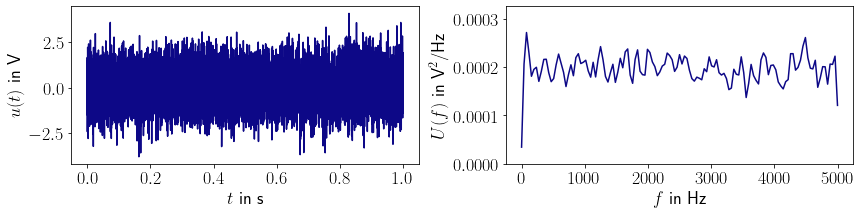

In [31]:
import scipy as sc
import scipy.signal
np.random.seed(123) #!
# 1 s "verrauschtes Messignal" mit 10 kHz Abtastung
N = int(1e4)
tt = np.linspace(0, 1, N)
Ts = tt[1] - tt[0] # Abtastzeit
uu = np.random.normal(0, 1, size=N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
ax1.plot(tt, uu)
ax1.set_xlabel("$t$ in s") #!
ax1.set_ylabel("$u(t)$ in V") #!

# Leistungsdichtespektrum bestimmen
ff, UU = sc.signal.welch(uu, fs=1/Ts)
ax2.plot(ff, UU)
# #!
ax2.set_ylim(0, max(UU)*1.2) #!
ax2.set_xlabel("$f$ in Hz") #!
ax2.set_ylabel("$U(f)$ in V${}^2$/Hz") #!
show_book("noise1b") #!

`end noise1`

In [32]:
plt.rcParams.update(double_plt_rcParams)
plt.rcParams['figure.subplot.right'] = .97
plt.rcParams['figure.subplot.left'] = 0.14

`begin noise2a`

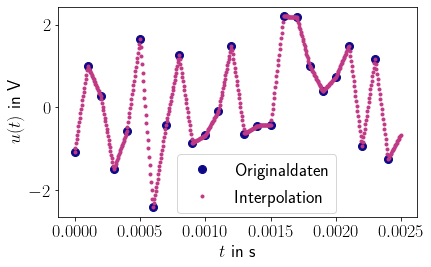

In [33]:
# Abtastrate durch lineare Interplolation erhöhen um Faktor K
from scipy import interpolate
K = 20
N2 = N*K
tt2 = np.linspace(0, 1, N2)

# Interpolationsfunktion bestimmen
ifunc = interpolate.interp1d(tt, uu, kind="linear")

# Interpolation durch Funktionsauswertung durchführen
uu2 = ifunc(tt2)

idx = 25 # Maximalindex für Darstellung
plt.plot(tt[:idx], uu[:idx], "o", ms=8, label="Originaldaten")
plt.plot(tt2[:idx*K], uu2[:idx*K], ".", label="Interpolation")
plt.legend(bbox_to_anchor=(0.8, 0.34)) #!
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
show_book("noise2a") #!

`end noise2a`

In [34]:
plt.rcParams['figure.subplot.left'] = .23 #!

`begin noise2b`

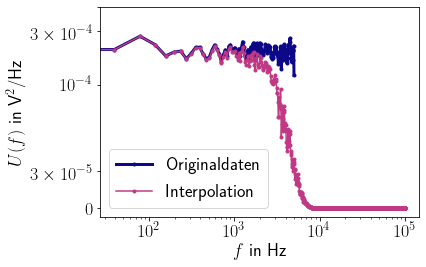

In [35]:
# Leistungsdichtespektrum des interpolierten Signals
ff2, UU2 = sc.signal.welch(uu2, fs=K/Ts, nperseg=256*K)
plt.loglog(ff, UU, '.-', lw=3, label="Originaldaten")
plt.loglog(ff2, UU2, '.-', label="Interpolation")
plt.yscale("symlog", linthresh=1e-4) # zweckmäßige Skalierung
plt.yticks([0, 3e-5, 1e-4, 3e-4, 5e-4]) #!
plt.legend() #!
plt.xlabel("$f$ in Hz") #!
plt.ylabel("$U(f)$ in V${}^2$/Hz") #!
show_book("noise2b", printflag=False) #!

`end noise2b`

In [36]:
# Empirische Adaption der Farb-Rotation. Ziel: bunte Grafiken die auch S/W noch gut aussehen.

import importlib
import pfi_util
importlib.reload(pfi_util) # sinnvoll nach Änderungen im Modul pfi_util
set_cmap_cycler = pfi_util.set_cmap_cycler

<function pfi_util.set_cmap_cycler(N=2, start=0, end=0.9, cmap=<matplotlib.colors.ListedColormap object at 0x7fe458cc6850>, values=None)>

### Filtern

In [37]:
set_cmap_cycler(2, start=0.8, end=0)

`begin filter1`

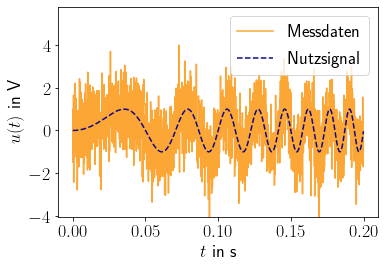

In [38]:
uu_nutz = np.sin(2*np.pi*200*tt*tt) # "Nutzsignal"
uu_total = uu_nutz + uu # Nutzsignal + bisheriges Rauschen
idx = int(tt.size*0.2) # Index von 0.2 s
plt.plot(tt[:idx], uu_total[:idx], label="Messdaten")
plt.plot(tt[:idx], uu_nutz[:idx], "--", label="Nutzsignal")
plt.legend(loc="upper right") #!
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.ylim([-4.05, 5.8]) #!
show_book("filter1") #!

`end filter1`

In [39]:
set_cmap_cycler(values=(0.8, 0.4, 0.2, 0.8))

`begin filter2`

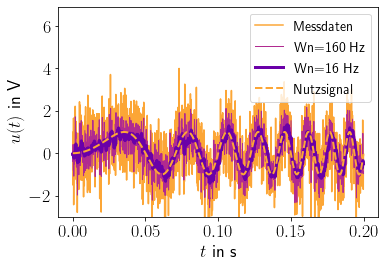

In [40]:
plt.plot(tt[:idx], uu_total[:idx], label="Messdaten")

# Filter-Entwurf:
num1, denom1 = sc.signal.butter(N=1, Wn=160, fs=1e3)
yy1 = sc.signal.lfilter(num1, denom1, uu_total) # Anwendung
plt.plot(tt[:idx], yy1[:idx], lw=1, label="Wn=160 Hz")

num2, denom2 = sc.signal.butter(N=1, Wn=16, fs=1e3)
yy2 = sc.signal.lfilter(num2, denom2, uu_total)
plt.plot(tt[:idx], yy2[:idx], lw=3, label="Wn=16 Hz")
# #!
plt.plot(tt[:idx], uu_nutz[:idx], "--", lw=2, label="Nutzsignal") #!
# plt.plot(tt[:idx], uu_nutz[:idx], "--", label="Nutzsignal") # nur für Legende #!
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right", fontsize=14) #!
plt.ylim([-3, 6.9]) #!
show_book("filter2a") #!

`end filter2`

In [41]:
# Bild ins Buch, aber Code nicht.

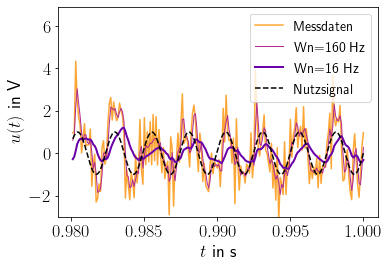

In [42]:
idx2 = -200

plt.plot(tt[idx2:], uu_total[idx2:], label="Messdaten")

plt.plot(tt[idx2:], yy1[idx2:], lw=1, label="Wn=160 Hz")

plt.plot(tt[idx2:], yy2[idx2:], lw=2, label="Wn=16 Hz")
plt.plot(tt[idx2:], uu_nutz[idx2:], "--", color="0", label="Nutzsignal")
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right", fontsize=14) #!
plt.ylim([-3, 6.9])
show_book("filter2b")

In [43]:
set_cmap_cycler(values=(0.8, 0.4, 0.0))

`begin filter3`

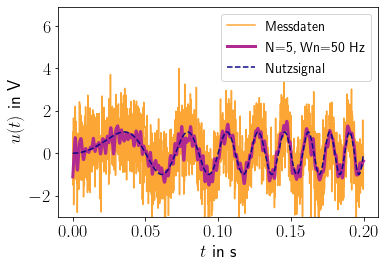

In [44]:
plt.plot(tt[:idx], uu_total[:idx], label="Messdaten")

# zeitdiskretes Filter 5. Ordnung
num1, denom1 = sc.signal.butter(5, Wn=50, fs=1e3)
yy1 = sc.signal.filtfilt(num1, denom1, uu_total)
plt.plot(tt[:idx], yy1[:idx], lw=3, label="N=5, Wn=50 Hz")
# #!
plt.plot(tt[:idx], uu_nutz[:idx], "--", label="Nutzsignal") # nur für Legende #!
#plt.plot(tt[:idx], uu_nutz[:idx], "-", lw=3, color="0.35") # für bessere Sichtbarkeit der weißen Line #!
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right", fontsize=14) #!
plt.ylim([-3, 6.9]) #!
show_book("filter3a") #!

`end filter3`

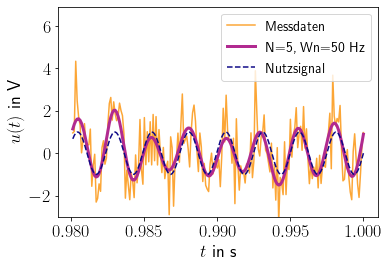

In [45]:
idx2 = -200

plt.plot(tt[idx2:], uu_total[idx2:], label="Messdaten")

plt.plot(tt[idx2:], yy1[idx2:], lw=3, label="N=5, Wn=50 Hz")

plt.plot(tt[idx2:], uu_nutz[idx2:], "--", label="Nutzsignal")
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right", fontsize=14) #!
plt.ylim([-3, 6.9])
show_book("filter3b")